<a href="https://colab.research.google.com/github/asluchych/introduction-econometrics/blob/main/Add%20chapter3_statsmodels.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Assignment 3: Interval Estimation and Hypothesis Testing
                  
                                                               
# Exercise 3: Life Insurance

In [35]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
from scipy.stats import t


Read data 

In [2]:
insurance = pd.read_csv("insur.csv")

In [4]:
insurance.describe()

,INCOME,INSURANCE
count,20.000000,20.000000
mean,59.300000,236.950000
std,29.376145,114.838319
min,23.000000,90.000000
25%,39.250000,160.000000
50%,56.000000,215.000000
75%,74.000000,300.500000
max,140.000000,570.000000


In [ ]:
x = insurance[["INCOME"]]
y = insurance[["INSURANCE"]]
x_const = sm.add_constant(x)

In [31]:
model1 = sm.OLS(y, x_const).fit()
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              INSURANCE   R-squared:                       0.985
Model:                            OLS   Adj. R-squared:                  0.984
Method:                 Least Squares   F-statistic:                     1198.
Date:                Fri, 20 May 2022   Prob (F-statistic):           6.39e-18
Time:                        21:29:03   Log-Likelihood:                -80.610
No. Observations:                  20   AIC:                             165.2
Df Residuals:                      18   BIC:                             167.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          6.8550      7.383      0.928      0.365      -8.657      22.367
INCOME         3.8802      0.112     34.606      0.000       3.645       4.116
==============================================================================
Omnibus:                        2.519   Durbin-Watson:                   3.176
Prob(Omnibus):                  0.284   Jarque-Bera (JB):                1.165
Skew:                          -0.111   Prob(JB):                        0.558
Kurtosis:                       1.839   Cond. No.                         151.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

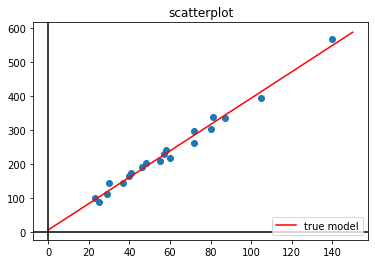

In [32]:
plt.scatter(x, y)
x_space = np.linspace(0, 150, 1000)
y_space = model1.params[1]*x_space + model1.params[0]
plt.plot(x_space, y_space, '-r', label = "true model")
plt.title("scatterplot")
plt.legend(loc = "lower right")
plt.axhline(y=0, color='k')
plt.axvline(x=0, color='k')
plt.show()


In [34]:
hypotheses = 'INCOME = 5, INCOME = 1'
t_test = model1.t_test(hypotheses)
print(t_test)

                             Test for Constraints                             
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
c0             3.8802      0.112     -9.987      0.000       3.645       4.116
c1             3.8802      0.112     25.687      0.000       3.645       4.116


In [58]:
df = insurance.shape[0] - model1.params.shape[0]
alpha = 0.05

In [59]:
t.ppf(1- alpha/2, df)

2.10092204024096